## Cache Plots

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

PHYSICAL_CORES=64

def plot(p_data, p_yId, p_xId, p_hueId, p_styleId, p_logScale=False, p_core_marker=False):
    rcParams['figure.figsize'] = 11.7,8.27
    plot = sns.lineplot(x=p_xId,
                        y=p_yId,
                        hue=p_hueId,
                        style=p_styleId,
                        data=p_data)
    if p_logScale == True:
        plot.set_yscale('log')
        plot.set_xscale('log')
    plot.set(xlabel=p_xId, ylabel=p_yId)
    plt.grid(True,which="both",ls="--",c='lightgray') 

    if(p_core_marker == True):
        plt.axvline(64, linestyle='--', color='red')

    plt.figure(figsize=(1, 1), dpi=80)
    plt.show()

### Gauss3

#### First touch

/var/folders/zt/h71khkbd7ll9krscx1zncwlc0000gn/T/ipykernel_39689/2535461451.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ref_runtime = data_frame[data_frame.bench_id == 'native'][data_frame.threads == 1]['runtime'].values[0]


   node_id    bench_id              impl_id region_id  obj_cols  obj_rows  \
0   gauss3      native  linear_stencil_para     apply      2050      2050   
2   gauss3      native  linear_stencil_para     apply      2050      2050   
4   gauss3      native  linear_stencil_para     apply      2050      2050   
6   gauss3      native  linear_stencil_para     apply      2050      2050   
8   gauss3      native  linear_stencil_para     apply      2050      2050   
10  gauss3      native  linear_stencil_para     apply      2050      2050   
12  gauss3      native  linear_stencil_para     apply      2050      2050   
14  gauss3      native  linear_stencil_para     apply      2050      2050   
16  gauss3  firsttouch       linear_stencil     apply      2050      2050   
18  gauss3  firsttouch       linear_stencil     apply      2050      2050   
20  gauss3  firsttouch       linear_stencil     apply      2050      2050   
22  gauss3  firsttouch       linear_stencil     apply      2050      2050   

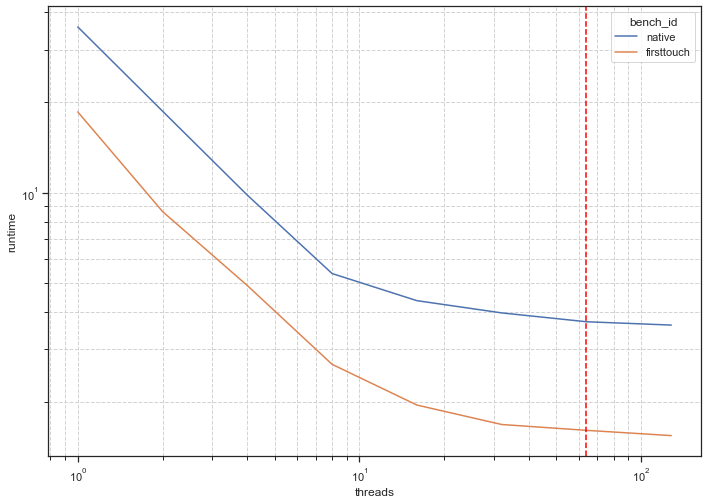

<Figure size 80x80 with 0 Axes>

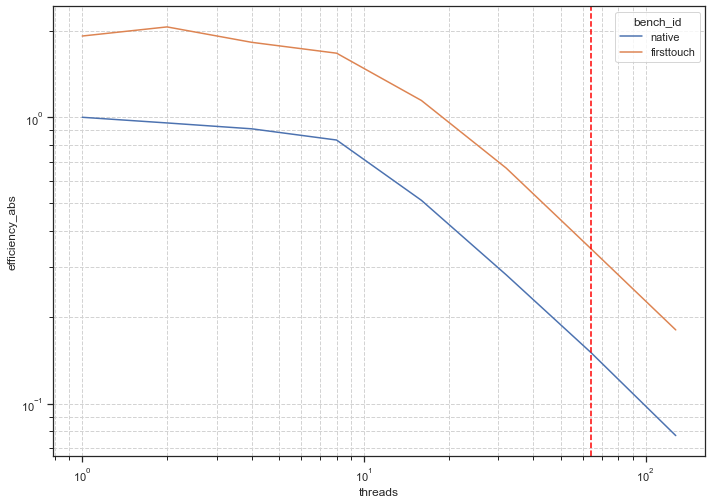

<Figure size 80x80 with 0 Axes>

In [12]:
import pandas as pd

sns.set_theme()
sns.set_style("ticks")

data_frame = pd.read_csv('./e_efficiency_01.csv')
data_frame = data_frame[data_frame.region_id == 'apply']

#
# NOTE: calc absolute efficiency
#
ref_runtime = data_frame[data_frame.bench_id == 'native'][data_frame.threads == 1]['runtime'].values[0]
data_frame = data_frame.assign(efficiency_abs=lambda p_entry: ref_runtime/(p_entry.runtime * p_entry.threads))

print(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='bench_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='efficiency_abs',
    p_xId='threads',
    p_hueId='bench_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)

#### First touch RND

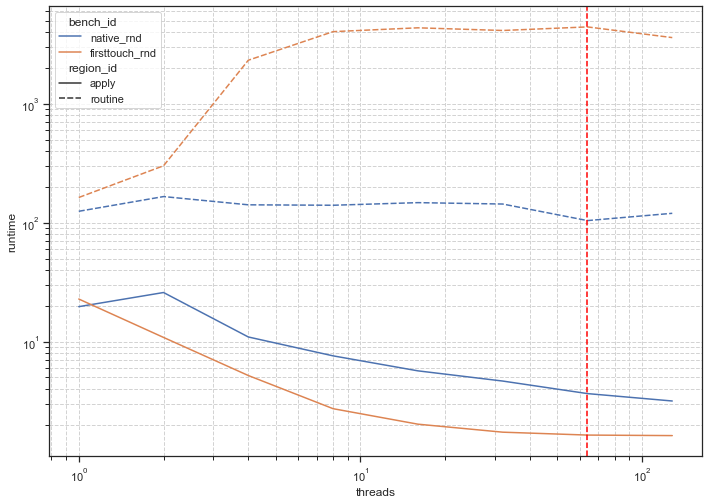

<Figure size 80x80 with 0 Axes>

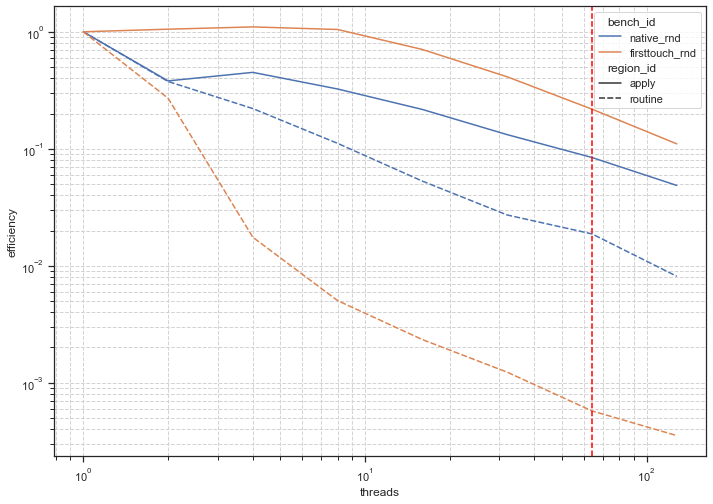

<Figure size 80x80 with 0 Axes>

In [13]:
import pandas as pd

data_frame = pd.read_csv('./e_linear_stencil_strong_scale_rnd_gauss3.csv')
# data_frame = data_frame[data_frame.region_id == 'apply']

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='bench_id',
    p_styleId='region_id',
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='threads',
    p_hueId='bench_id',
    p_styleId='region_id',
    p_logScale=True,
    p_core_marker=True)

#### NUMA

##### bandwidth

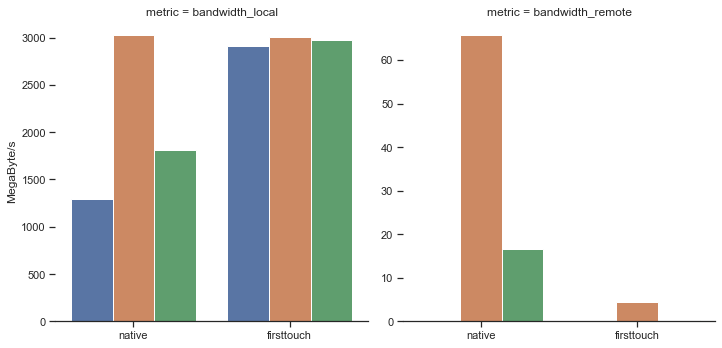

In [14]:
import pandas as pd
import seaborn as sns

data_frame = pd.read_csv('./e_numa.csv')
data_frame = data_frame[data_frame.property != 'sum']
data_frame = data_frame[data_frame.metric_type == 'speed']

rcParams['figure.figsize'] = 12,8
rcParams['font.size'] = 12
rcParams['svg.fonttype'] = 'none'

g = sns.catplot(
    data=data_frame,
    kind='bar',
    x='impl_id',
    y='value',
    hue='property',
    col='metric',
    sharey=False,
    legend=False
)

g.despine(left=True)
g.set_axis_labels("", "MegaByte/s")

g.savefig('numa_bandwidth.svg')

##### data_volume

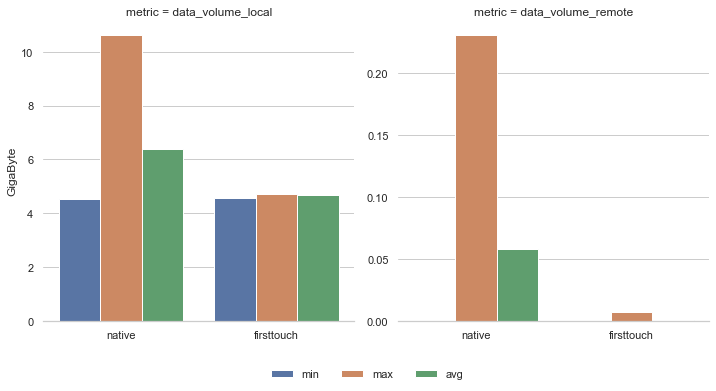

In [15]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

data_frame = pd.read_csv('./e_numa.csv')
data_frame = data_frame[data_frame.property != 'sum']
data_frame = data_frame[data_frame.metric_type == 'amount']

rcParams['figure.figsize'] = 12,8
rcParams['font.size'] = 12
rcParams['svg.fonttype'] = 'none'

g = sns.catplot(
    data=data_frame,
    kind="bar",
    x="impl_id",
    y="value",
    hue="property",
    col="metric",
    sharey=False,
    legend=False
)

g.despine(left=True)
g.set_axis_labels("", "GigaByte")

# g.fig.get_axes()[0].legend(loc='lower center')
# sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
g.add_legend(
    bbox_to_anchor=(0.4,-0.1),
    loc='lower center',
    ncol=3,
    )

g.savefig('numa_data_volume.svg')